In [39]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import warnings 
import gensim
from gensim.models import Word2Vec
import time
import re
import os
import random
from collections import Counter
from nltk.tokenize import regexp_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings 

warnings.filterwarnings(action = 'ignore') 

In [49]:
#data = pd.read_csv('./russian-troll-tweets-master/IRAhandle_tweets_1.csv')
def load_data():
    directory = "./russian-troll-tweets-master/"
    outF = open("tweets.txt", "a")
    for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                data = pd.read_csv(directory+file)
                for index, row in data.iterrows():
                    outF.write(str(row['content']))
                    outF.write("\n")

In [60]:
word_list_h = []
word_list_m = []
def load_lines():
    filepath = 'tweets.txt'
    with open(filepath) as fp:
        for cnt, line in enumerate(fp):
            wordh = regexp_tokenize(line.lower(), r'([#|@]\w+)')
            if (len(wordh)>0):
                for word in wordh:
                    if '#' in word:
                        word_list_h.append(word)
                    else:
                        word_list_m.append(word)
            yield gensim.utils.simple_preprocess (line)      

In [61]:
document = list(load_lines())
len(document)

2946192

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]), <a list of 8 Text xticklabel objects>)

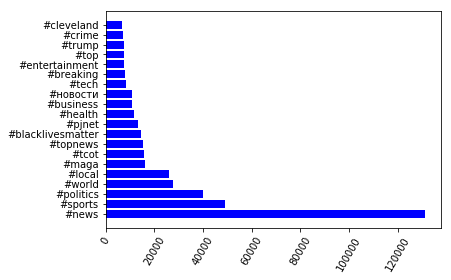

In [62]:
summary = Counter(word_list_h)
dh = dict(summary.most_common(20))
y_pos = np.arange(len(dh.keys()))
x_pos = list(dh.values())
fig, ax = plt.subplots()
ax.barh(y_pos, x_pos, color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(dh.keys())
plt.xticks(rotation=60)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text xticklabel objects>)

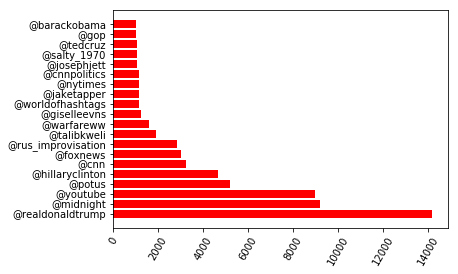

In [63]:
summary_m = Counter(word_list_m)
dm = dict(summary_m.most_common(20))
y_pos = np.arange(len(dm.keys()))
x_pos = list(dm.values())
fig, ax = plt.subplots()
ax.barh(y_pos, x_pos, color='red')
ax.set_yticks(y_pos)
ax.set_yticklabels(dm.keys())
plt.xticks(rotation=60)

In [300]:
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.save("word2vec.model")

In [301]:
model = Word2Vec.load("word2vec.model")
model.train(documents,total_examples=len(documents),epochs=10)

(27664872, 37231690)

In [307]:
word1 = "election"
word2 = "america"
vocab1 = model.wv.most_similar (positive=[word1, word2],topn=5)
vocab2 = model.wv.most_similar (negative=[word1, word2],topn=5)

In [308]:
v1 = []
for item in vocab1:
    v1.append(item[0])
X1 = model[v1]

v2 = []
for item in vocab2:
    v2.append(item[0])
X2 = model[v2]

In [309]:
tsne = TSNE(n_components=2)
X1_tsne = tsne.fit_transform(X1)
X2_tsne = tsne.fit_transform(X2)

In [310]:
df1 = pd.DataFrame(X1_tsne, index=vocab1, columns=['x', 'y'])
df2 = pd.DataFrame(X2_tsne, index=vocab2, columns=['x', 'y'])

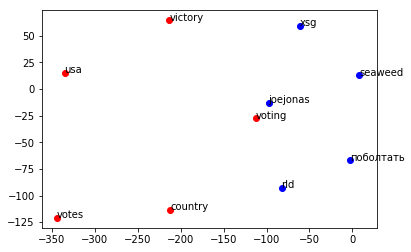

In [311]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df1['x'], df1['y'], color='red')
ax.scatter(df2['x'], df2['y'], color='blue')

for word, pos in df1.iterrows():
    ax.annotate(word[0], pos)
    
for word, pos in df2.iterrows():
    ax.annotate(word[0], pos)


In [312]:
model.wv.doesnt_match(["clinton","trump","russia","man","lady","america"])

'russia'

In [313]:
model.wv.most_similar(positive=["doctor"], topn=1)

[('child', 0.6027951240539551)]

In [314]:
model.wv.most_similar(positive=["nurse"], topn=1)

[('retrievers', 0.6444978713989258)]

In [315]:
model.wv.most_similar(positive=["leader"], topn=1)

[('champion', 0.49257734417915344)]

In [316]:
model.wv.most_similar(negative=["leader"], topn=1)

[('рублей', 0.39763349294662476)]

In [317]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('martin', 0.53109210729599)]

In [318]:
model.wv.most_similar(positive=['fakenews'])

[('propaganda', 0.6536456346511841),
 ('biased', 0.6383413672447205),
 ('msnbc', 0.6195933222770691),
 ('msm', 0.6002708673477173),
 ('lies', 0.5875386595726013),
 ('cnn', 0.5706169009208679),
 ('reporting', 0.5679146647453308),
 ('journalism', 0.5336812138557434),
 ('reporters', 0.5321282148361206),
 ('false', 0.5317617654800415)]